In [77]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "drive/MyDrive/111"
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/111'
/content/drive/MyDrive/111
butterfly.jpg	     DoG_result.jpg  pset2project.pdf
DoG_result_dp05.jpg  LoG_result.jpg  sunflowers.jpg


In [78]:
import scipy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time


#Problem 1: Scale space blob detection

img_rgb = cv2.imread('butterfly.jpg')
img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) / 255
#create LoG filter
filter = scipy.ndimage.gaussian_laplace
k = 1.3
#define scales
scales = [2 * k ** i for i in range(15)]

In [79]:
#calculate and save scale space for each scale
scale_space = []
t1 = time.perf_counter()
for scale in scales:
  filtered_img = filter(img, sigma= scale)
  normalized_img = -1 * (scale ** 2) * filtered_img
  scale_space.append(normalized_img)
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

time taken to run: 1.6359782430008636


In [80]:
#non maximum surpression between scale spaces
scale_space = np.array(scale_space)
nms_scale_space = scipy.ndimage.rank_filter(scale_space, rank = -1, size = 3)

#threshold
nms_scale_space[nms_scale_space < 0.05] = -1

#get the center point of found blobs
blob_origins = (scale_space == nms_scale_space)

centers = []
x_list = []
y_list = []
for origins in blob_origins:
  y , x= np.where(origins == True)
  x_list.append(x)
  y_list.append(y)


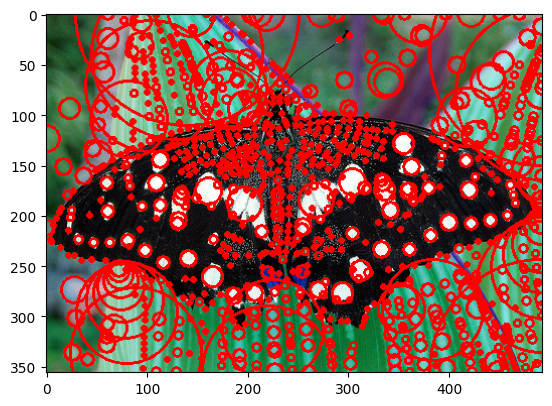

In [81]:
blobs_img = img_rgb.copy()
for i in range(15):
  radius = int(scales[i] * (2 ** 0.5))
  for j in range(len(x_list[i])):
    blobs_img = cv2.circle(blobs_img , center = (x_list[i][j] , y_list[i][j]) , radius=radius , color=(255, 0, 0) , thickness=2)

plt.imshow(blobs_img)
plt.show()
plt.imsave('LoG_result.jpg', blobs_img)


In [82]:
#Problem 2
#calculate gaussian pyramid
t1 = time.perf_counter()
filter = scipy.ndimage.gaussian_filter
gaussian_blurred = []
for scale in scales:
  filtered_img = filter(img, sigma= scale)
  gaussian_blurred.append(filtered_img)
DoG_scale_space = [gaussian_blurred[i] - gaussian_blurred[i + 1] for i in range(len(gaussian_blurred) - 1)]
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

time taken to run: 0.7858005810012401


In [83]:
#non maximum surpression between scale spaces
DoG_scale_space = np.array(DoG_scale_space)
nms_DoG_scale_space = scipy.ndimage.rank_filter(DoG_scale_space, rank = -1, size = 3)

#threshold
nms_DoG_scale_space[nms_DoG_scale_space < 0.01] = -1

#get the center point of found blobs
blob_origins = (DoG_scale_space == nms_DoG_scale_space)

centers = []
x_list = []
y_list = []
for origins in blob_origins:
  y , x= np.where(origins == True)
  x_list.append(x)
  y_list.append(y)



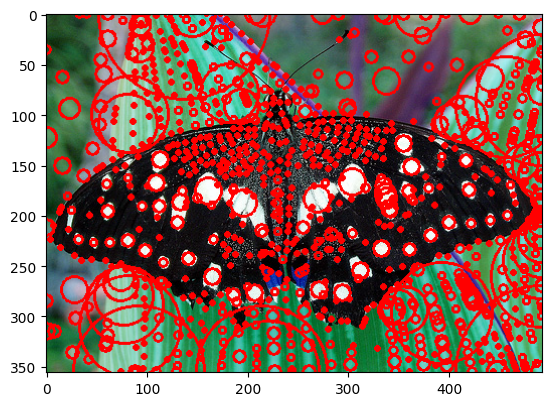

In [84]:
blobs_img = img_rgb.copy()
for i in range(len(DoG_scale_space)):
  radius = int(scales[i] * (2 ** 0.5))
  for j in range(len(x_list[i])):
    blobs_img = cv2.circle(blobs_img , center = (x_list[i][j] , y_list[i][j]) , radius=radius , color=(255, 0, 0) , thickness=2)

plt.imshow(blobs_img)
plt.show()
plt.imsave('DoG_result.jpg', blobs_img)